Using Velocity and Cellrank with Streams
========================================

This example shows how MIRA's lineage inference, plotting, and tracing capabilities can be combined with `CellRank`, which offers a generalized version of the stochastic markov chain model of differentiation that can utilize velocity information. CellRank also provides more advanced and scalable methods for terminal/initial state selection and terminal lineage probability calculations. 

This tutorial begins by following the basic CellRank velocity tutorial. After computing absoption probabilities for each cell, we can then use MIRA to parse those probabilities into bifurcating lineages.

In [19]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import mira
from IPython.display import display, Image
import matplotlib.pyplot as plt

scv.settings.verbosity = 3
cr.settings.verbosity = 2

import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)
mira.utils.pretty_sderr()

In [4]:
adata = scv.datasets.pancreas()

scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


recovering dynamics (using 8/12 cores)


  0%|          | 0/1295 [00:00<?, ?gene/s]

    finished (0:02:36) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


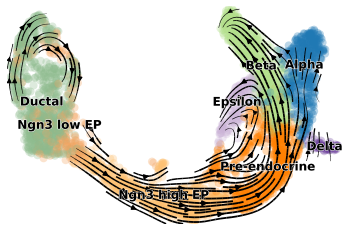

In [5]:
scv.tl.recover_dynamics(adata, n_jobs=8)

scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4
)

Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  
/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/cellrank/tl/_init_term_states.py:161: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  **kwargs,


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:06)
Computing Schur decomposition
Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999922e-01 8.0734852408665247e-03 -1.3939720968571084e-02 1.6711722091868716e-02 -2.6729757323936221e-02 
0.0000000000000000e+00 9.8776010871620534e-01 -1.0924894189798409e-02 3.0945357751443709e-02 2.8694207884616341e-02 
0.0000000000000000e+00 0.0000000000000000e+00 9.8597300904777974e-01 1.2846676832100178e-02 -2.4631237672415930e-03 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.5327128881414147e-01 -1.1276550785823255e-02 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.2593561028091487e-01 
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `5` macrostates


INFO:root:Using pre-computed Schur decomposition


Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['terminal_states']`
       `adata.obs['terminal_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


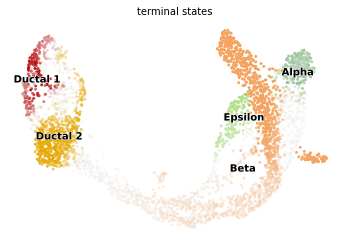

In [35]:
cr.tl.terminal_states(adata, cluster_key="clusters", weight_connectivities=0,
                     n_states=5, force_recompute=True)
cr.pl.terminal_states(adata)

Accessing `adata.obsp['T_bwd']`
Using precomputed transition matrix
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eigendecomposition_bwd']`
       `.eigendecomposition`
    Finish (0:00:00)
For 1 macrostate, stationary distribution is computed
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['initial_states']`
       `adata.obs['initial_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


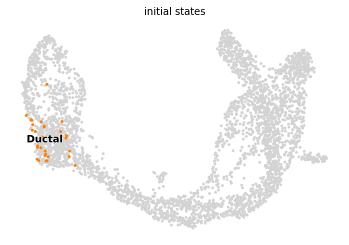

In [36]:
cr.tl.initial_states(adata, cluster_key="clusters")
cr.pl.initial_states(adata, discrete=True)

Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:06)
Using a connectivity kernel with weight `0.5`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing absorption probabilities


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  


  0%|          | 0/5 [00:00<?, ?/s]

Fatal Python error: GC object already tracked

Thread 0x000070000c30d000 (most recent call first):
  File "/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/traceback.py", line 121 in format_exception
  File "/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/traceback.py", line 508 in __init__
  File "/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/traceback.py", line 361 in extract
  File "/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/traceback.py", line 310 in walk_tb
  File "/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel/iostream.py", line 500 in write
  File "/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel/iostream.py", line 216 in schedule
  File "/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel/iostream.py", line 419 in _is_master_process
  File "/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel/iostream.py"

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:00:01)


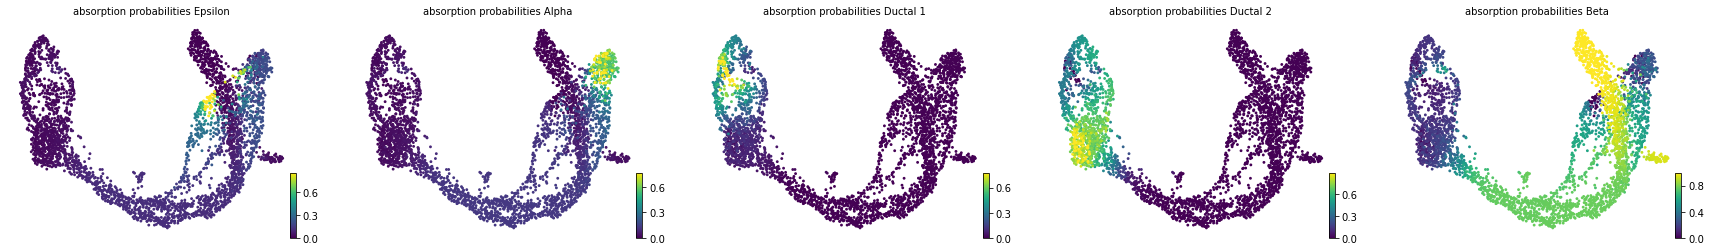

In [39]:
cr.tl.transition_matrix(adata, weight_connectivities=0.5)
cr.tl.lineages(adata,)
cr.pl.lineages(adata, same_plot=False)

In [40]:
scv.tl.velocity_pseudotime(adata)

INFO:mira.adata_interface.pseudotime:Added key to obs: tree_states
INFO:mira.adata_interface.pseudotime:Added key to uns: tree_state_names
INFO:mira.adata_interface.pseudotime:Added key to uns: connectivities_tree
... storing 'tree_states' as categorical


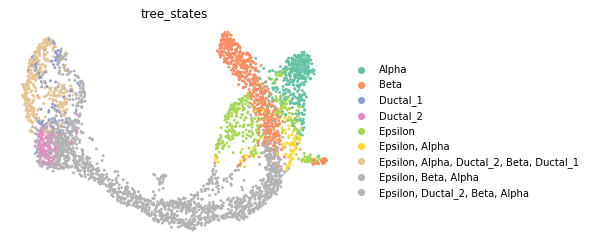

In [47]:
mira.time.get_tree_structure(adata, threshold = 0.8, start_cell = int(adata.obs.initial_states_probs.argmax()),
            pseudotime_key = 'velocity_pseudotime', cellrank = True)
sc.pl.umap(adata, color = 'tree_states', palette = 'Set2', frameon = False)

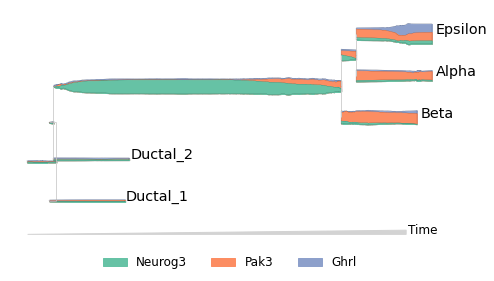

In [48]:
mira.pl.plot_stream(adata, pseudotime_key='velocity_pseudotime',
                   data = ['Pak3','Neurog3','Ghrl'], log_pseudotime=False, palette = 'Set2',
                   scale_features=True, figsize=(7,4), max_bar_height=0.99, clip = 1, min_pseudotime = 0.2)
plt.show()

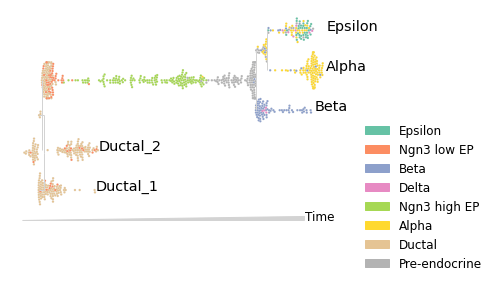

In [49]:
adata.obs.clusters = adata.obs.clusters.astype(str)
mira.pl.plot_stream(adata, pseudotime_key='velocity_pseudotime', style = 'swarm', max_swarm_density=500,
                   data = 'clusters', log_pseudotime=False, palette = 'Set2', size = 5, max_bar_height=0.9,
                   scale_features=True, figsize=(7,4), min_pseudotime = 0.2, linecolor = 'lightgrey')
plt.show()

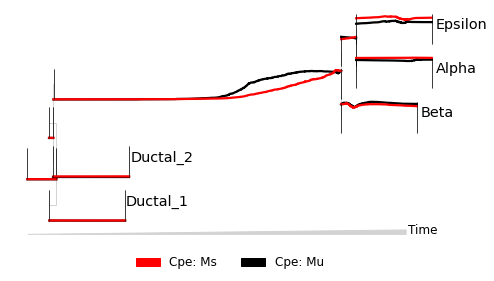

In [50]:
mira.pl.plot_stream(adata, pseudotime_key='velocity_pseudotime', layers=['Ms','Mu'], style = 'line', size = 5,
                   data = ['Cpe','Cpe'], log_pseudotime=False, palette = ['red','black'], window_size=101,
                   scale_features=True, figsize=(7,4), max_bar_height=0.7, clip = 1, min_pseudotime = 0.2)
plt.show()

In [51]:
cr.tl.transition_matrix(adata, weight_connectivities=0)

Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:06)


<VelocityKernel>

INFO:mira.pseudotime.backtrace:Creating transport map ...
INFO:mira.pseudotime.backtrace:Tracing ancestral populations ...


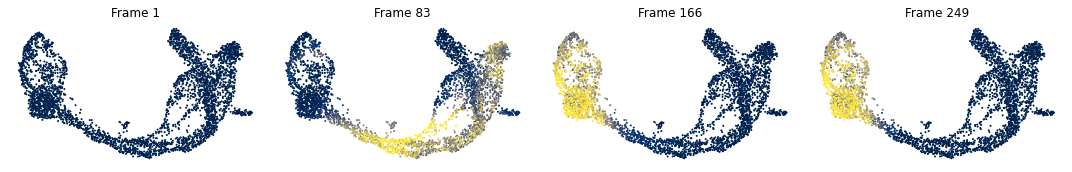

INFO:mira.pseudotime.backtrace:Creating animation ...
INFO:mira.pseudotime.backtrace:Saving animation ...
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


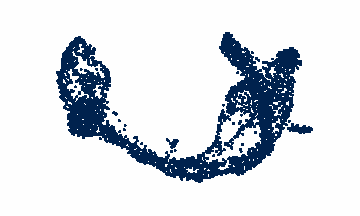

In [15]:
mira.time.trace_differentiation(adata, start_cells= (adata.obs.terminal_states == 'Epsilon').values,
                               direction='forward', transport_map_key='T_bwd', save_name='data/velocity_test.gif',
                               log_prob = True, num_steps=250, steps_per_frame=1, sqrt_time=True, palette='cividis',
                               vmax_quantile=0.95, figsize = (5,3), size = 1, fps=24, add_outline = False,
                               num_preview_frames=3)

with open('data/velocity_test.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

INFO:mira.pseudotime.backtrace:Creating transport map ...
INFO:mira.pseudotime.backtrace:Tracing ancestral populations ...


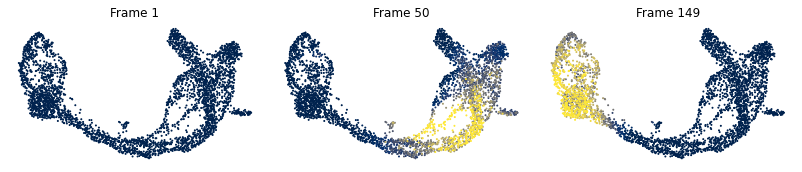

INFO:mira.pseudotime.backtrace:Creating animation ...
INFO:mira.pseudotime.backtrace:Saving animation ...
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


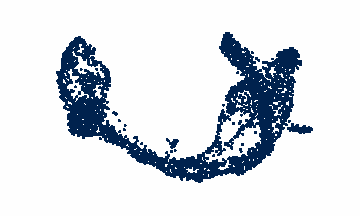

In [16]:
mira.time.trace_differentiation(adata, start_cells= (adata.obs.terminal_states == 'Beta').values,
                               direction='forward', transport_map_key='T_bwd', save_name='data/velocity_test.gif',
                               log_prob = True, num_steps=150, steps_per_frame=1, sqrt_time=True, palette='cividis',
                               vmax_quantile=0.95, figsize = (5,3), size = 1, fps=24, add_outline = False,
                               num_preview_frames=3)

with open('data/velocity_test.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

INFO:mira.pseudotime.backtrace:Creating transport map ...
INFO:mira.pseudotime.backtrace:Tracing ancestral populations ...


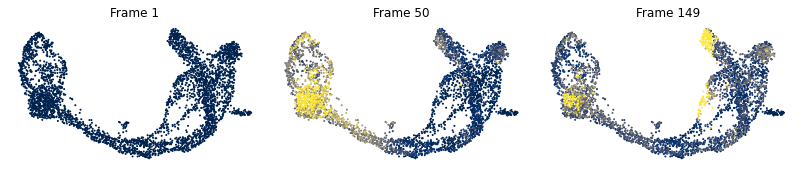

INFO:mira.pseudotime.backtrace:Creating animation ...
INFO:mira.pseudotime.backtrace:Saving animation ...
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


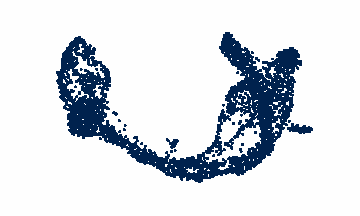

In [17]:
mira.time.trace_differentiation(adata, start_cells= [int(adata.obs.initial_states_probs.argmax())],
                               transport_map_key='T_fwd', save_name='data/velocity_test.gif',
                               log_prob = True, num_steps=150, steps_per_frame=1, sqrt_time=True, palette='cividis',
                               vmax_quantile=0.95, figsize = (5,3), size = 1, fps=24, add_outline = False,
                               num_preview_frames=3)

with open('data/velocity_test.gif','rb') as f:
    display(Image(data=f.read(), format='png'))